In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

from sklearn import  datasets
plt.show()

In [96]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

In [97]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ashs',
                  'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                  'Proanthcyanins', 'Color itensity', 'Hue', 'OD280/OD315 of diluted wines',
                  'Proline']

In [30]:
df_wine_drop = df_wine.drop(['Hue', 'Proline','Proanthcyanins','OD280/OD315 of diluted wines', 'Magnesium'], axis=1)

In [32]:
sns.pairplot?

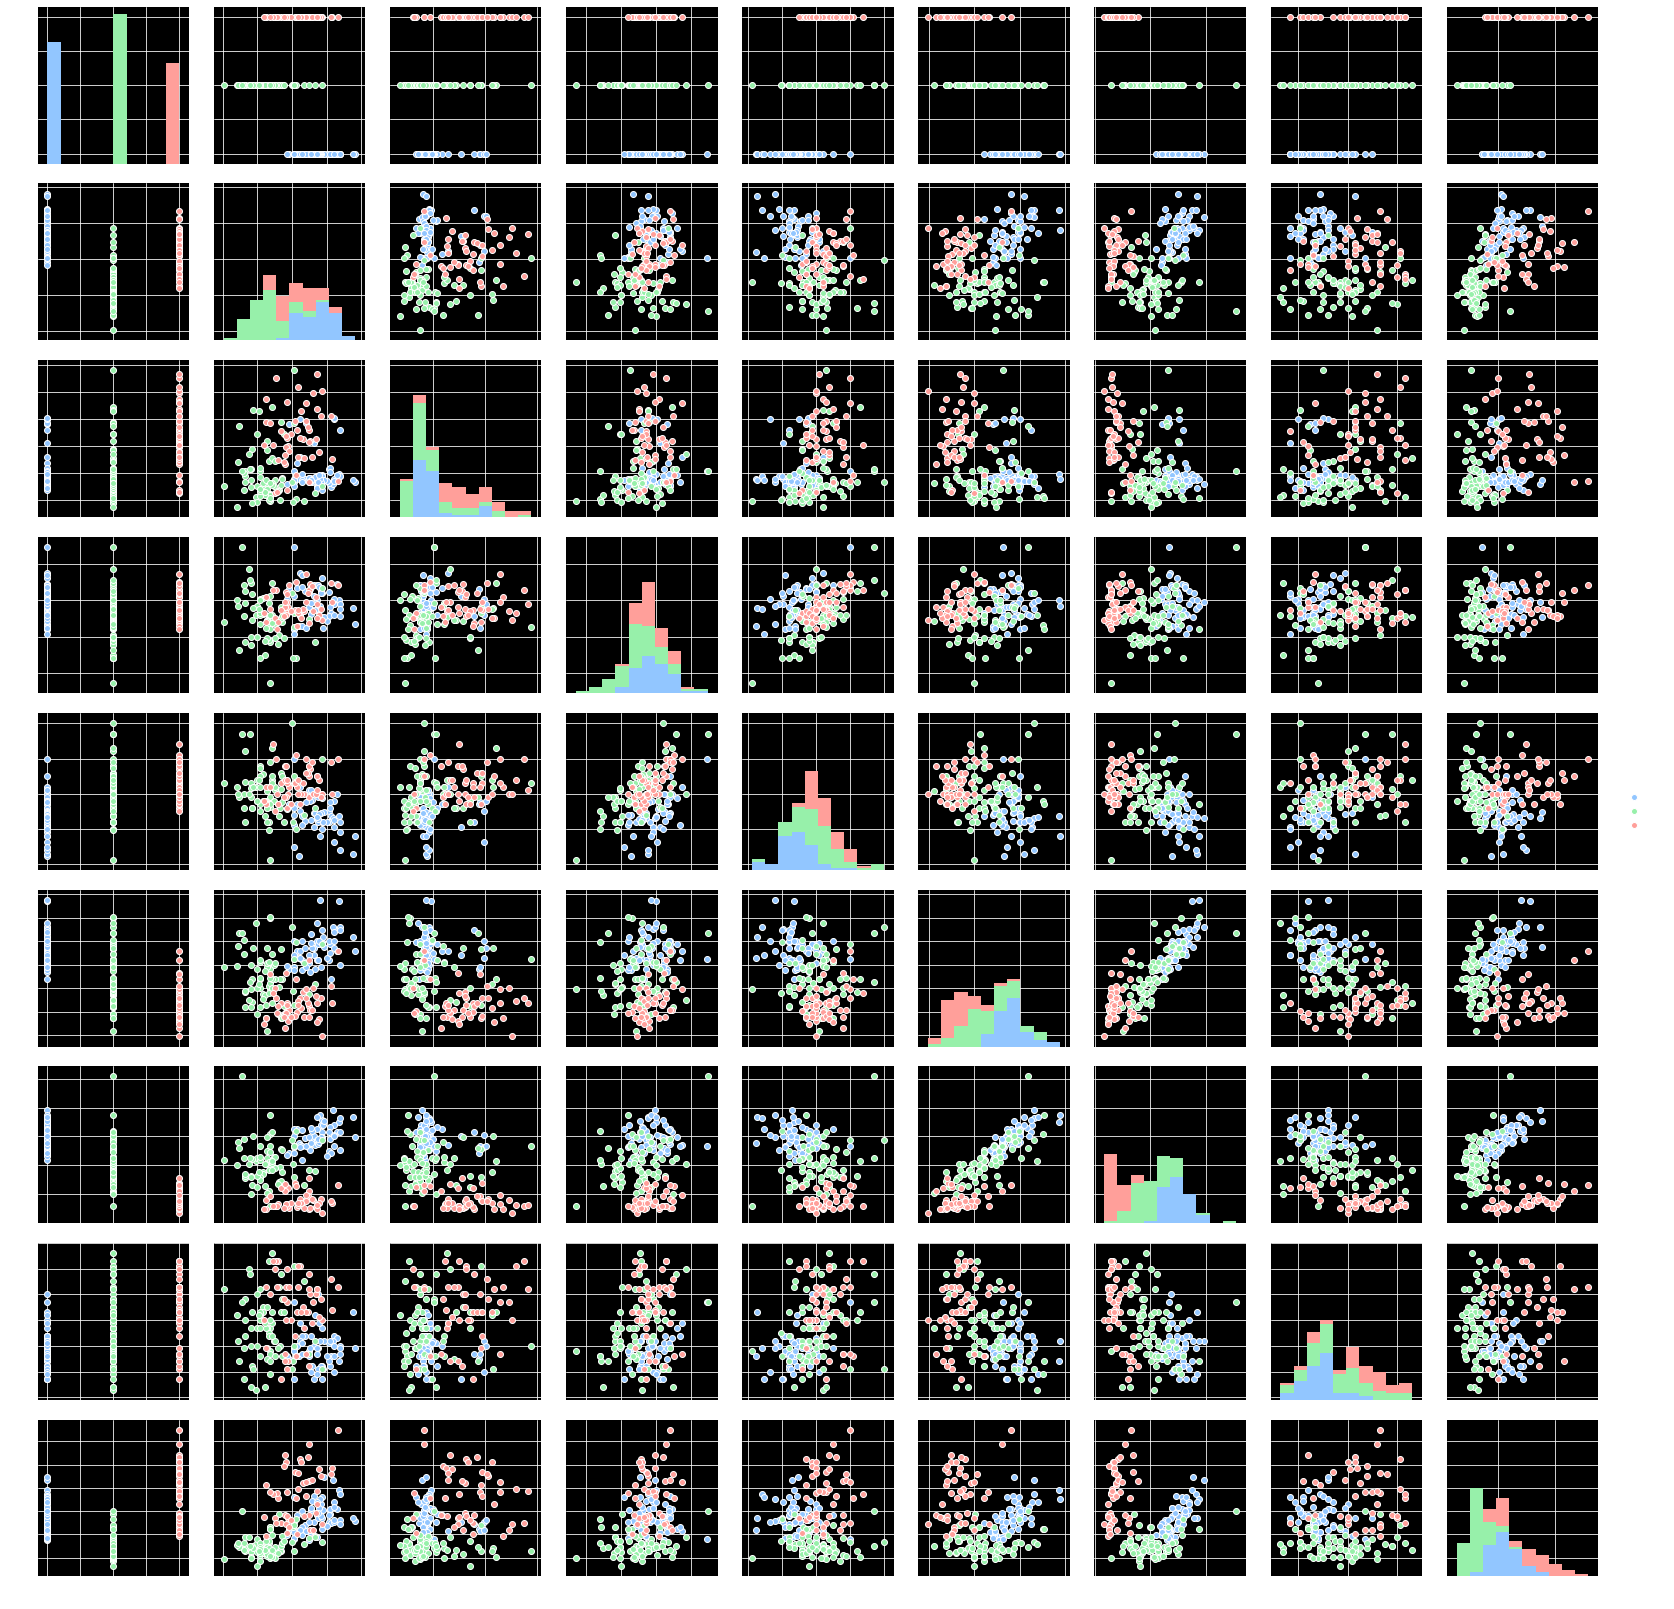

In [35]:
sns.pairplot(df_wine_drop, hue='Class label', palette='pastel')

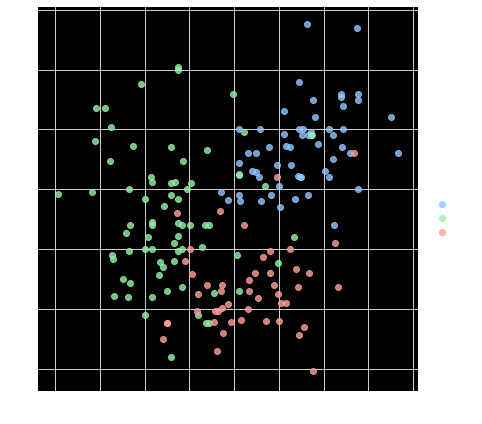

In [21]:

sns.lmplot(x='Alcohol', y='Total phenols', hue='Class label', data=df_wine,fit_reg=False, palette='pastel', aspect=1, size=6)

In [37]:
df_corr = df_wine_drop.corr()

In [39]:
sns.heatmap?

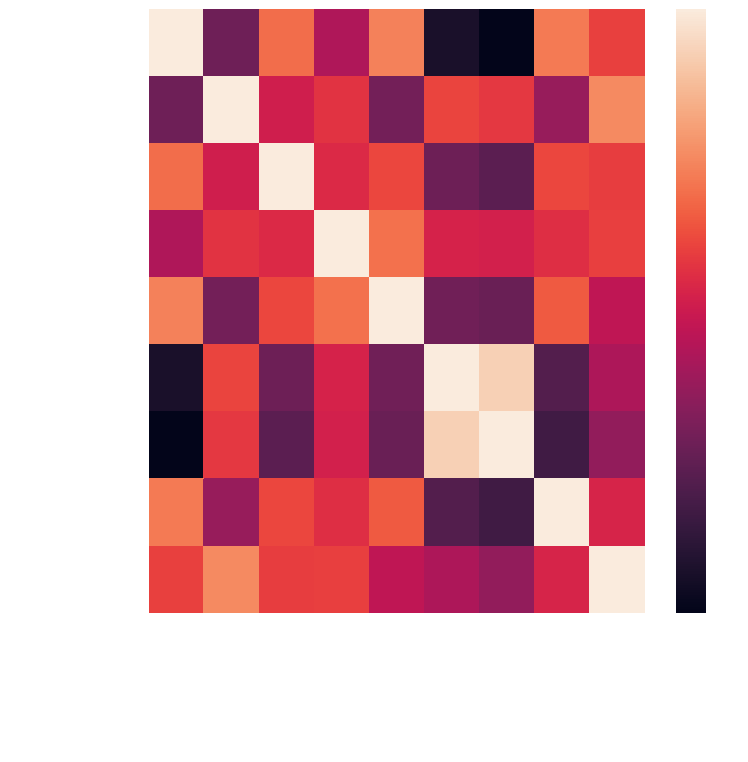

In [42]:
fig = plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(df_corr)

In [43]:
df_corr

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ashs,Total phenols,Flavanoids,Nonflavanoid phenols,Color itensity
Class label,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.717933,-0.846485,0.487215,0.268562
Alcohol,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.284543,0.230133,-0.151445,0.547883
Malic acid,0.436127,0.099963,1.000000,0.164955,0.286148,-0.333512,-0.409324,0.291501,0.250053
Ash,-0.048260,0.210964,0.164955,1.000000,0.446698,0.128176,0.114084,0.187354,0.258643
Alcalinity of ashs,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.317583,-0.346922,0.359395,0.020478
Total phenols,-0.717933,0.284543,-0.333512,0.128176,-0.317583,1.000000,0.864046,-0.448301,-0.056401
Flavanoids,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.864046,1.000000,-0.536326,-0.174411
Nonflavanoid phenols,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.448301,-0.536326,1.000000,0.140192
Color itensity,0.268562,0.547883,0.250053,0.258643,0.020478,-0.056401,-0.174411,0.140192,1.000000


### トレーニングセットを分割

In [98]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ashs,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthcyanins,Color itensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [114]:
round(df_wine.describe(),1)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ashs,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthcyanins,Color itensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0,177.0
mean,1.9,13.0,2.3,2.4,19.5,99.6,2.3,2.0,0.4,1.6,5.1,1.0,2.6,745.1
std,0.8,0.8,1.1,0.3,3.3,14.2,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,1.0,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,1.0,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.0
50%,2.0,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,672.0
75%,3.0,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0
max,3.0,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


In [118]:
X = df_wine.loc[: , df_wine.columns != 'Class label']
y = df_wine.loc[:,'Class label']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### 特徴量の標準化

In [120]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

### 正則化の例 >> L1正則化

In [121]:
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  1.0


In [122]:
lr.intercept_

array([-1.15529848, -1.06478471, -2.12060442])

In [123]:
lr.coef_

array([[ 1.46989496,  0.        ,  0.51641256, -1.31187115,  0.        ,
         0.        ,  1.23805029,  0.        ,  0.        ,  0.        ,
         0.        ,  0.69111661,  2.16689299],
       [-1.85506028, -0.31528146, -1.18233073,  0.68855636, -0.15432532,
         0.        ,  0.60624223,  0.        ,  0.15275238, -1.2082185 ,
         1.25258273,  0.        , -2.05333483],
       [ 0.        ,  0.22607067,  0.57382705,  0.        ,  0.12206959,
         0.        , -2.56168835, -0.13857414,  0.        ,  1.62516894,
        -0.90270134, -0.39651907,  0.        ]])

In [111]:
weights, params, predict = [], [], []
for c in np.arange(-4,6):
    c = 10.**c
    lr = LogisticRegression(penalty='l1', C=c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(c)
    predict.append(lr.score(X_test_std, y_test))

weights = np.array(weights)

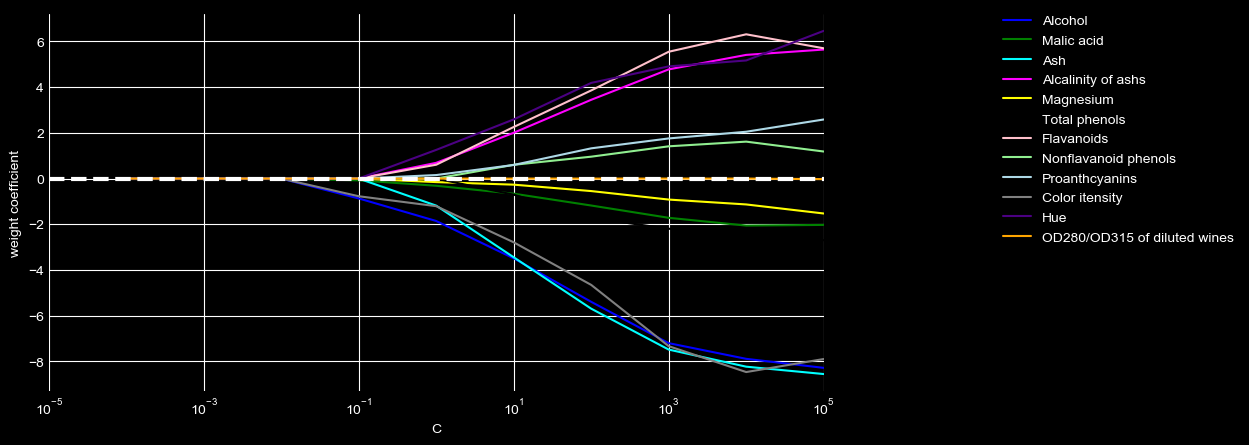

In [106]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax = plt.subplot(111)
colors = ['blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label = df_wine.columns[column+1], color=color)

plt.axhline(0, color='white', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend('loc=upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

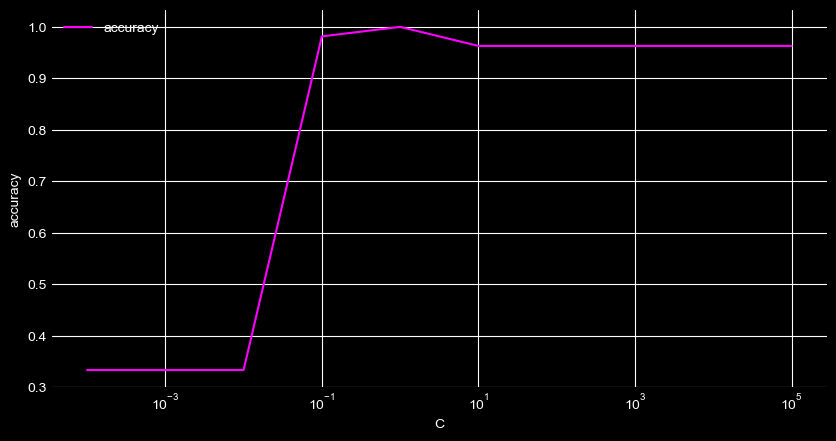

In [107]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax = plt.axes()
ax.plot(params, predict, label = 'accuracy', color="magenta")
ax.set_ylabel('accuracy')
ax.set_xlabel('C')
ax.legend(loc='upper left')
ax.set_xscale('log')

### 特徴点抽出法 >> 逐次特徴選択アルゴリズム

In [74]:
from sklearn.base import  clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [76]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        
        self.kscore_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

Text(0.5,0,'Number of features')

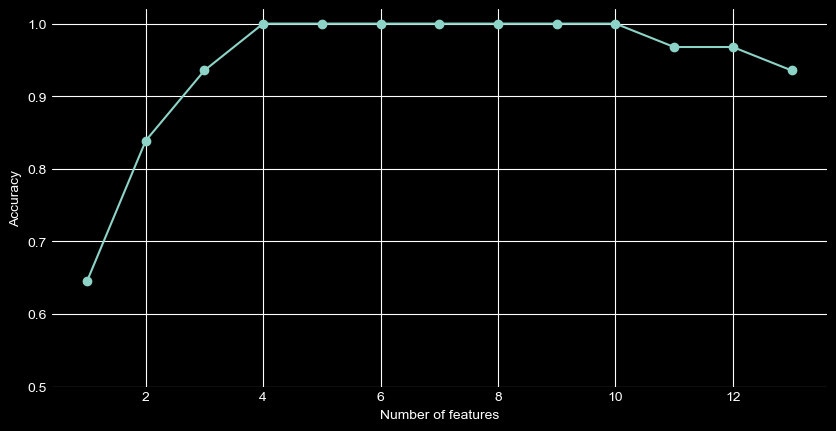

In [129]:
fig = plt.figure(figsize=(10,5),dpi=100)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.5, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')

In [130]:
k4 = list(sbs.subsets_[9])
print(df_wine.columns[1:][k4])

Index(['Alcohol', 'Ash', 'Alcalinity of ashs', 'Proanthcyanins'], dtype='object')


In [131]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', round(knn.score(X_train_std, y_train),2))
print('Test accuracy: ', round(knn.score(X_test_std, y_test),2))

Training accuracy:  0.96
Test accuracy:  0.96


In [136]:
knn.fit(X_train_std[:,:3], y_train)
print('Training accuracy: ', round(knn.score(X_train_std[:,:3], y_train),2))
print('Test accuracy: ', round(knn.score(X_test_std[:,:3], y_test),2))

Training accuracy:  0.86
Test accuracy:  0.72
